In [79]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


df = pd.read_csv("netflix_titles.csv", sep=",")

In [80]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [81]:
df["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [82]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [83]:
df["cast"].nunique()

7692

In [84]:
df[(df["rating"] != "TV-MA") & (df["type"] == "TV Show")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
20,s21,TV Show,Monsters Inside: The 24 Faces of Billy Milligan,Olivier Megaton,NaN,NaN,"September 22, 2021",2021,TV-14,1 Season,"Crime TV Shows, Docuseries, International TV S...","In the late 1970s, an accused serial rapist cl..."
21,s22,TV Show,Resurrection: Ertugrul,NaN,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",Turkey,"September 22, 2021",2018,TV-14,5 Seasons,"International TV Shows, TV Action & Adventure,...",When a good deed unwittingly endangers his cla...
25,s26,TV Show,Love on the Spectrum,NaN,Brooke Satchwell,Australia,"September 21, 2021",2021,TV-14,2 Seasons,"Docuseries, International TV Shows, Reality TV",Finding love can be hard for anyone. For young...
34,s35,TV Show,Tayo and Little Wizards,NaN,"Dami Lee, Jason Lee, Bommie Catherine Han, Jen...",NaN,"September 17, 2021",2020,TV-Y7,1 Season,Kids' TV,Tayo speeds into an adventure when his friends...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [85]:
category = ["title", "director", "cast", "country", "date_added", "release_year", "duration", "description"]

df_encoded = df.copy()
encoder = LabelEncoder()

for col in category:
    df_encoded[col] = encoder.fit_transform(df[col].astype(str)) 

df_encoded.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,1975,2295,7677,603,1711,72,PG-13,210,Documentaries,2577
1,s2,TV Show,1091,4516,409,426,1706,73,TV-MA,110,"International TV Shows, TV Dramas, TV Mysteries",1762
2,s3,TV Show,2651,2105,6296,748,1706,73,TV-MA,0,"Crime TV Shows, International TV Shows, TV Act...",7341
3,s4,TV Show,3506,4516,7677,748,1706,73,TV-MA,0,"Docuseries, Reality TV",3617
4,s5,TV Show,3861,4516,4815,251,1706,73,TV-MA,110,"International TV Shows, Romantic TV Shows, TV ...",4416


In [86]:

dfTemp = df["listed_in"].astype(str).apply(lambda x: x.split(", "))
dfTemp = pd.DataFrame(dfTemp.tolist())

encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(dfTemp)

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out())
df_final = df.join(encoded_df)

df_final.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,x2_TV Action & Adventure,x2_TV Comedies,x2_TV Dramas,x2_TV Horror,x2_TV Mysteries,x2_TV Sci-Fi & Fantasy,x2_TV Thrillers,x2_Teen TV Shows,x2_Thrillers,x2_None
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
df_encoded["type"] = df_encoded["type"].map({"TV Show": 1, "Movie": 2})


In [88]:
df_encoded.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,2,1975,2295,7677,603,1711,72,PG-13,210,Documentaries,2577
1,s2,1,1091,4516,409,426,1706,73,TV-MA,110,"International TV Shows, TV Dramas, TV Mysteries",1762
2,s3,1,2651,2105,6296,748,1706,73,TV-MA,0,"Crime TV Shows, International TV Shows, TV Act...",7341
3,s4,1,3506,4516,7677,748,1706,73,TV-MA,0,"Docuseries, Reality TV",3617
4,s5,1,3861,4516,4815,251,1706,73,TV-MA,110,"International TV Shows, Romantic TV Shows, TV ...",4416


In [89]:
df_encoded["rating"].nunique()

17

In [90]:
dfTemp = df_encoded[["director", "duration"]]
dfTemp.head()

,director,duration
0,2295,210
1,4516,110
2,2105,0
3,4516,0
4,4516,110


In [91]:
optimal_k = 2


kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(dfTemp)
labels = kmeans.labels_

# Add cluster labels to the original dataset
dfTemp["Cluster"] = labels

# Print the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[4080.43151212   79.43478261]
 [1381.02715434  114.38875035]]


C:\Users\Guillaume dse\AppData\Local\Temp\ipykernel_9900\1919867804.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTemp["Cluster"] = labels


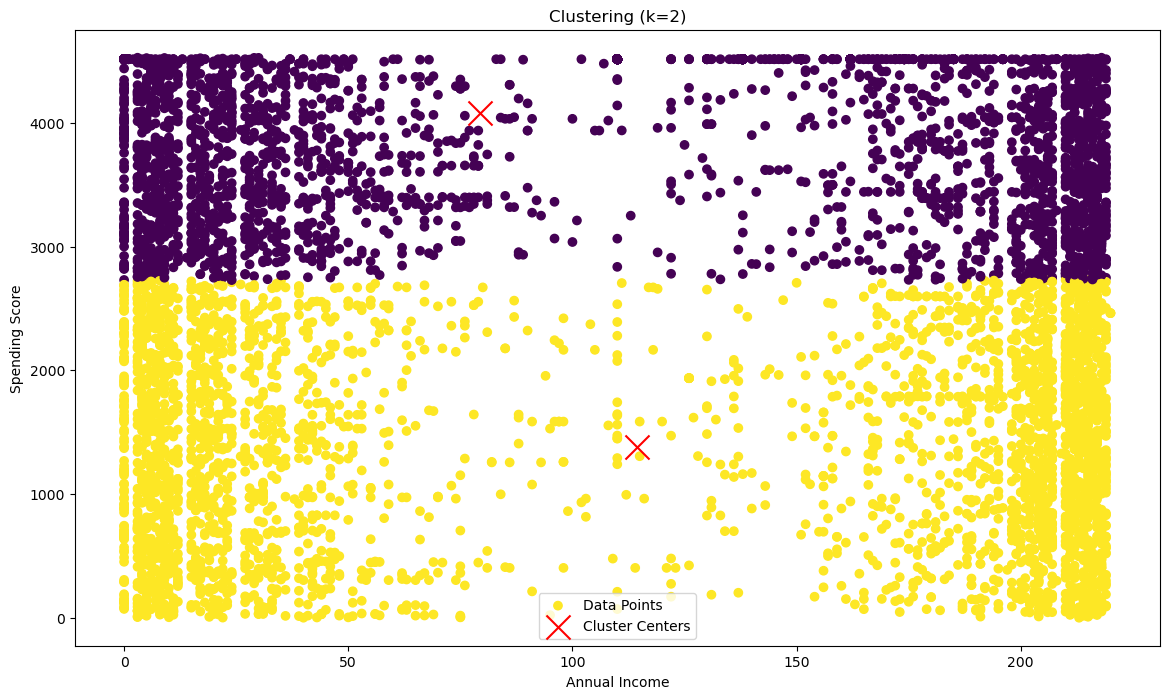

In [92]:

plt.figure(figsize=(14, 8))
plt.scatter(dfTemp["duration"], dfTemp["director"], 
            c=labels,cmap='viridis', marker='o', label="Data Points")

plt.scatter(kmeans.cluster_centers_[:, dfTemp.columns.get_loc("duration")],
    kmeans.cluster_centers_[:, dfTemp.columns.get_loc("director")],
    s=300, c='red', marker='x', label="Cluster Centers")

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title(f"Clustering (k={optimal_k})")
plt.legend()
plt.show()


In [95]:
from sklearn.preprocessing import StandardScaler

# Select only integer columns
int_columns = ["type", "director", "cast", "country", "date_added", "release_year", "duration", "description"]

scaler = StandardScaler()
df_encoded[int_columns] = scaler.fit_transform(df_encoded[int_columns])


In [101]:
optimal_k = 2

dfTemp = df_encoded[["director", "duration"]]

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(dfTemp)
labels = kmeans.labels_

# Add cluster labels to the original dataset
dfTemp["Cluster"] = labels

# Print the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[ 0.71817869 -0.47247862]
 [-0.86982023  0.57224124]]


C:\Users\Guillaume dse\AppData\Local\Temp\ipykernel_9900\117786040.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTemp["Cluster"] = labels


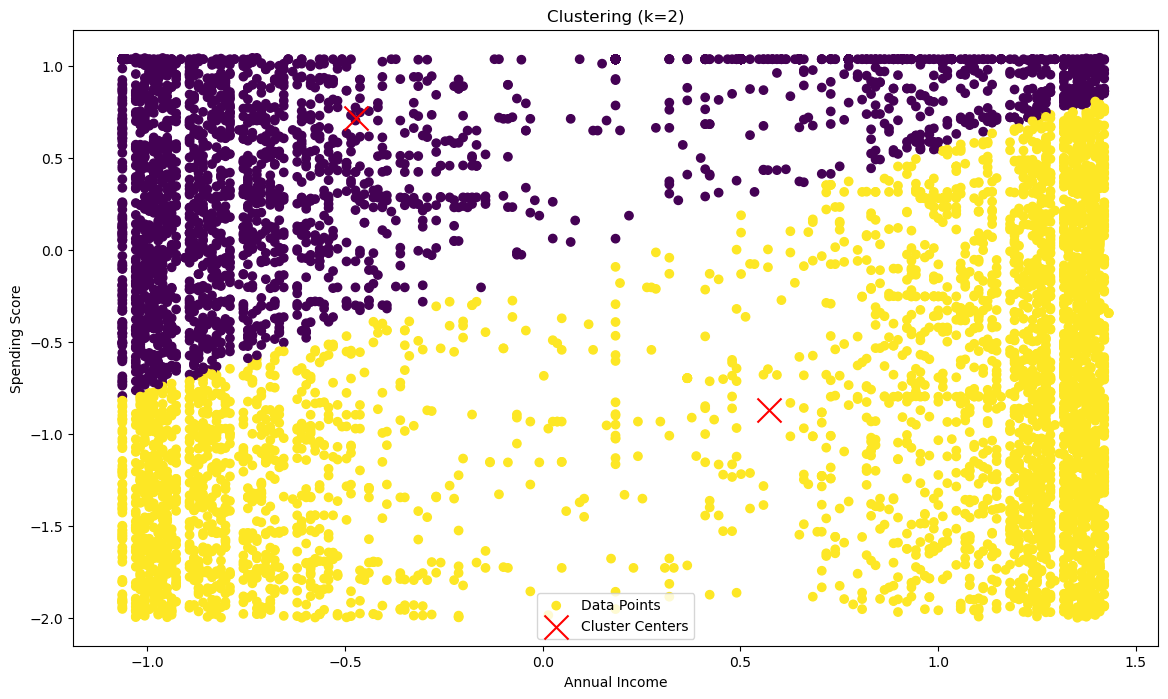

In [102]:

plt.figure(figsize=(14, 8))
plt.scatter(dfTemp["duration"], dfTemp["director"], 
            c=labels,cmap='viridis', marker='o', label="Data Points")

plt.scatter(kmeans.cluster_centers_[:, dfTemp.columns.get_loc("duration")],
    kmeans.cluster_centers_[:, dfTemp.columns.get_loc("director")],
    s=300, c='red', marker='x', label="Cluster Centers")

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title(f"Clustering (k={optimal_k})")
plt.legend()
plt.show()
